### Zadanie 1
Porównać w języku Julia reprezentację bitową liczby 1/3 dla Float32, Float64 oraz liczby, która jest inicjalizowana jako Float32, a potem rzutowana na Float64.

In [23]:
decode(x::Float32) = (b=bitstring(x); (b[1], b[2:9], b[10:32]))
decode(x::Float64) = (b=bitstring(x); (b[1], b[2:12], b[13:54]))

decode (generic function with 2 methods)

In [24]:
decode(Float32(1/3))

('0', "01111101", "01010101010101010101011")

In [25]:
decode(Float64(1/3))

('0', "01111111101", "010101010101010101010101010101010101010101")

In [26]:
decode(Float64(Float32(1/3)))

('0', "01111111101", "010101010101010101010110000000000000000000")

### Zadanie 2 
Zbadać, jak zmienia się odległość między kolejnymi liczbami zminnoprzecinkowymi reprezentowanymi w komputerze za pomocą języka Julia. Narysować wykres używając Plots zależności odległości od wartości liczby dla zakresu od 1.0 do 1000.0 z krokiem 1.0.

In [51]:
using Plots

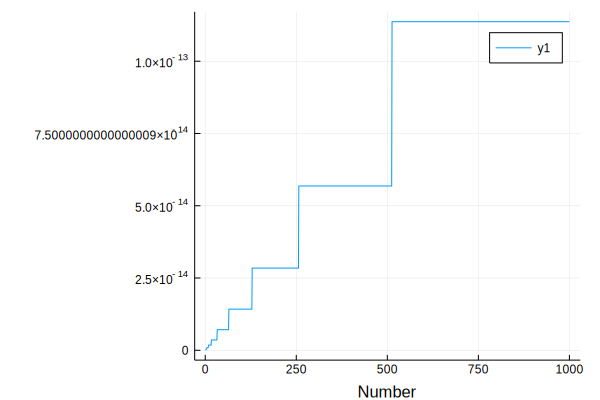

In [59]:
c=Float64[]
a=Float32(0)
r=1:1000
for i=r
    push!(c,nextfloat(a)-a)
    a+=1.0
end
plot(1:1:1000,c,xlabel = "Number")

### Zadanie 3
Jedną z bibliotek numerycznych, jaką będziemy używać na zajęciach jest <a href="http://home.agh.edu.pl/~kzajac/dydakt/mownit/lab1/gsl.html">GSL</a> (język C). Korzystając ze <a href="https://www.gnu.org/software/gsl/doc/html/ieee754.html"> wsparcia dla wyświetlania reprezentacji liczb zmiennoprzecinkowych</a> zobaczyć jak zmienia się cecha i mantysa dla coraz mniejszych liczb. Zaobserwować, kiedy matysa przestaje być znormalizowana i dlaczego?

In [3]:
# Kod w C:
#include <gsl/gsl_interp.h>
#include <stdio.h>
#include <gsl/gsl_ieee_utils.h>

int main(void){

  float f = 1.0;

  while(f != 0){
    gsl_ieee_printf_float(&f);
    printf("\n");
    f = f/3;
  }
  return 0;
}

LoadError: syntax: extra token "main" after end of expression